# Advanced visualization

> Want to fully customize your plots? Here we go!

> Note that most of the plots shown in this notebook are to demonstrate the capability of matplotlib, and they are not necessary the prettiest figures!

<table><tr>
<td width="350"> <img src="img/logo/matplotlib.png"/> </td>
<td width="350"> <img src="img/logo/seaborn.png"/> </td>
</tr></table>

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.interpolate import griddata

%matplotlib inline

In [3]:
# reset the sns style
sns.reset_orig()

## Fully customize the matplotlib plot

In [4]:
# from http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html
N = 50
x = np.random.rand(N)
y = np.random.rand(N)

colors = x+y**2

Text(0, 0.5, 'y_value')

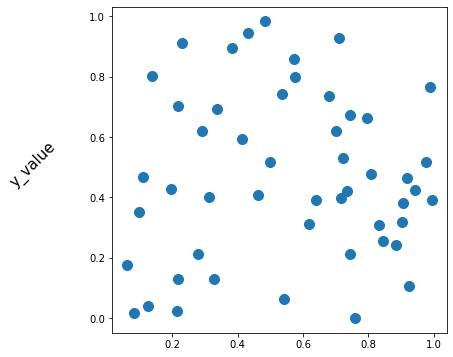

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(x, y, marker="o", s=100)
ax.set_ylabel("y_value", fontsize=15, labelpad = 50, rotation=45)

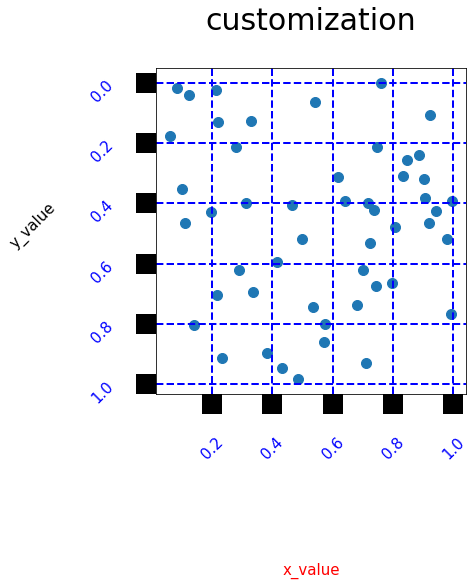

In [6]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(x, y, s=100, marker="o")

# below is how you customize the plot

# set ax labels
ax.set_xlabel("x_value", fontsize=15, color="red", labelpad = 100)
ax.set_ylabel("y_value", fontsize=15, labelpad = 50, rotation=45)

# set title
ax.set_title("customization", fontsize=30, y = 1.1)

# set ax ticks and ticklabels
ax.tick_params(axis="both", 
               which="major",
               length=20,
               width=20,
               labelsize=15,
               labelcolor="blue",
               pad=20,
               rotation=45)

# invert y axis
ax.invert_yaxis()

# set aspect ratio
ax.set_aspect(1)
# ax.set_aspect("equal") # same with ax.set_aspect(1)

# set grid
ax.grid(ls="dashed", lw=2, color="blue")



###  *Exercise*

> Modify the above figure: make y_value label horizontal; reduce the space between x tick label and x axis; decrease the major tick length and width on y axis


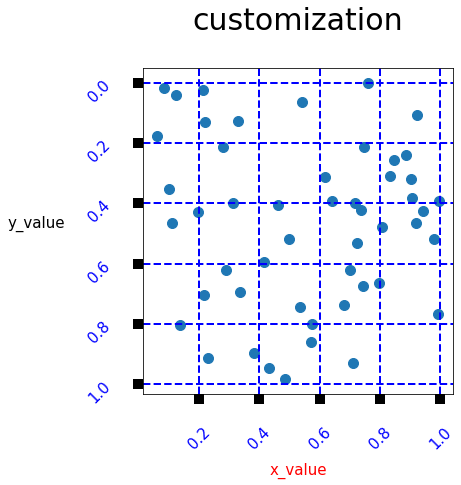

In [7]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(x, y, s=100, marker="o")

# below is how you customize the plot

# set ax labels
ax.set_xlabel("x_value", fontsize=15, color="red", labelpad = 10)
ax.set_ylabel("y_value", fontsize=15, labelpad = 50, rotation=0)

# set title
ax.set_title("customization", fontsize=30, y = 1.1)

# set ax ticks and ticklabels
ax.tick_params(axis="both", 
               which="major",
               length=10,
               width=10,
               labelsize=15,
               labelcolor="blue",
               pad=20,
               rotation=45)

# invert y axis
ax.invert_yaxis()

# set aspect ratio
ax.set_aspect(1)
# ax.set_aspect("equal") # same with ax.set_aspect(1)

# set grid
ax.grid(ls="dashed", lw=2, color="blue")


## let's dive even deeper

### specify the major/minor tick/ticklabel

1. `plt.MaxNLocator` can be used to set the maximum number of N intervals at nice locations
2. `plt.MultipleLocator` can be used for setting ticks at multiples of a given base
3. `plt.FixedLocator` can be used to place ticks at explicitly specified coordinates. 

To change ticker strategy, we can use the `set_major_locator` and the `set_minor_locator` methods in `Axes.xaxis` and `Axes.yaxis`.

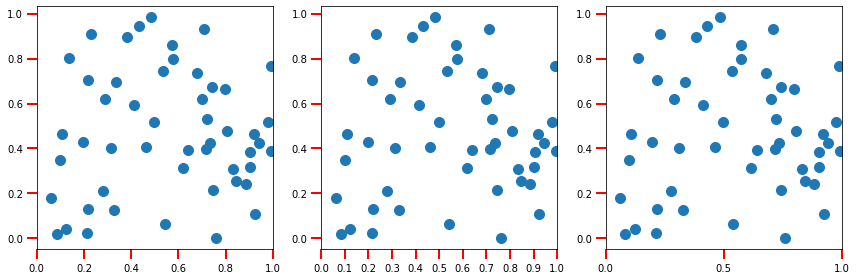

In [8]:
# this is for major tick/ticklabel

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

# create the basic plot
for ax in axs:
    ax.scatter(x, y, marker="o", s=100)
    ax.set_xlim(0, 1)
    


# style 1: set up the maximum number of ticks
axs[0].xaxis.set_major_locator(plt.MaxNLocator(5))

# style 2: set up the interval between the ticks
axs[1].xaxis.set_major_locator(plt.MultipleLocator(0.1))

# style 3: set up the manual location of the ticks
axs[2].xaxis.set_major_locator(plt.FixedLocator([0,0.5,1]))

# change the tick length, width and color
for ax in axs:
    ax.tick_params(length=10, width=2, color="red")

fig.tight_layout()

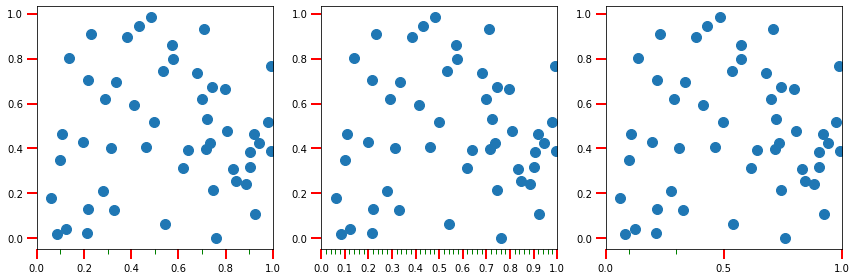

In [9]:
# let's change minor tick

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

for ax in axs:
    ax.scatter(x, y, marker="o", s=100)
    ax.set_xlim(0, 1)

# style 1: set up the maximum number of ticks
axs[0].xaxis.set_major_locator(plt.MaxNLocator(5))
axs[0].xaxis.set_minor_locator(plt.MaxNLocator(10))


# style 2: set up the interval between the ticks
axs[1].xaxis.set_major_locator(plt.MultipleLocator(0.1))
axs[1].xaxis.set_minor_locator(plt.MultipleLocator(0.02))

# style 3: set up the manual location of the ticks
axs[2].xaxis.set_major_locator(plt.FixedLocator([0,0.5,1]))
axs[2].xaxis.set_minor_locator(plt.FixedLocator([0, 0.1, 0.3]))


# change the tick length, width and color
for ax in axs:
    ax.tick_params(which="major", length=10, width=2, color="red")
    ax.tick_params(which="minor", length=5, width=1, color="green")

fig.tight_layout()

### specify the gridlines that match the major/minor tick/ticklabel

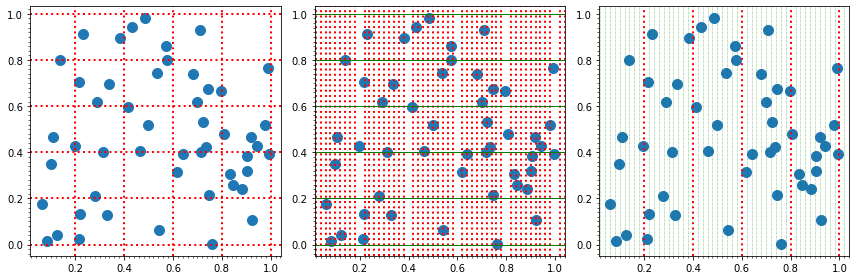

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

for ax in axs:
    ax.scatter(x, y, s=100, marker="o")
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.02))
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(0.02))

# set up grids for both axes with the same style
axs[0].grid(axis="both", which="major", color="red", ls="dotted", lw=2)

# set up grids for both axes with different styles
axs[1].grid(axis="x", which="minor", color="red", ls="dotted", lw=2)
axs[1].grid(axis="y", which="major", color="green", ls="solid", lw=1)

# set up grids only for x
axs[2].grid(axis="x", which="major", color="red", ls="dotted", lw=2)
axs[2].grid(axis="x", which="minor", color="green", ls="dotted", lw=0.5)


fig.tight_layout()

### change the decimal places of your tick labels

use `plt.FormatStrFormatter()` and `set_major_formatter()`

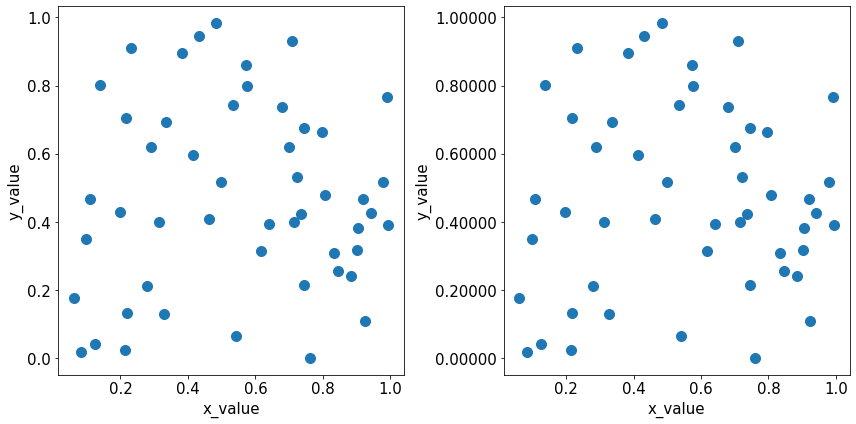

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# the left figure
axs[0].scatter(x, y, s=100, marker="o")

# set ax labels
axs[0].set_xlabel("x_value", fontsize=15)
axs[0].set_ylabel("y_value", fontsize=15)

# set ax ticklabels
axs[0].tick_params(labelsize=15)

# the right figure
axs[1].scatter(x, y, s=100, marker="o")

axs[1].set_xlabel("x_value", fontsize=15)
axs[1].set_ylabel("y_value", fontsize=15)

# set ax ticklabels
axs[1].tick_params(labelsize=15)

# change the format: five digits after the decimal
formatter = plt.FormatStrFormatter('%.5f')
axs[1].yaxis.set_major_formatter(formatter)

fig.tight_layout()

### change the number notation of the tick labels

use `plt.ScalarFormatter()` and`set_major_formatter()`

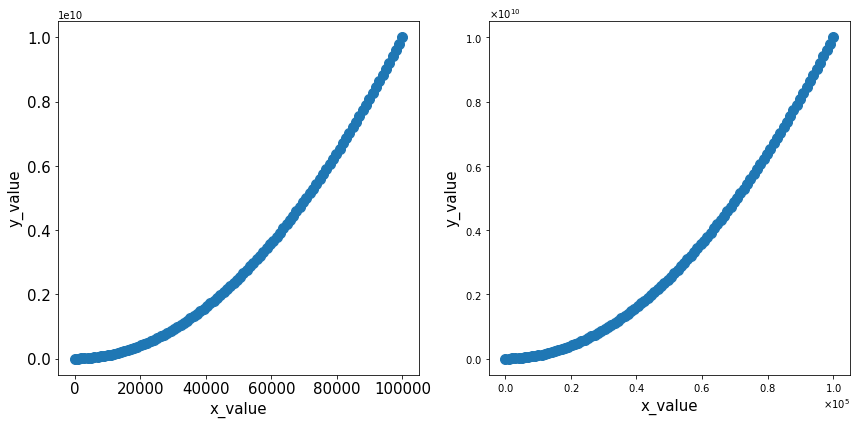

In [12]:
# create some big numbers
x2 = np.linspace(0, 1e5, 100)
y2 = x2 ** 2

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# the left figure
axs[0].scatter(x2, y2, s=100, marker="o")

# set ax labels
axs[0].set_xlabel("x_value", fontsize=15)
axs[0].set_ylabel("y_value", fontsize=15)

# set ax ticklabels
axs[0].tick_params(labelsize=15)

# the right figure
axs[1].scatter(x2, y2, s=100, marker="o")

axs[1].set_xlabel("x_value", fontsize=15)
axs[1].set_ylabel("y_value", fontsize=15)

# change number notation
formatter = plt.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) # use scientific notation

# if the number is smaller than 0.1 (10**-1) or bigger than 10 (10**1), scientific notation will be used
formatter.set_powerlimits((-1,1))

axs[1].xaxis.set_major_formatter(formatter)
axs[1].yaxis.set_major_formatter(formatter)

fig.tight_layout()


###  *Exercise*

> Add gridlines to the above two subplots. In addition, don't use scientific notation on the x axis of the right subplot


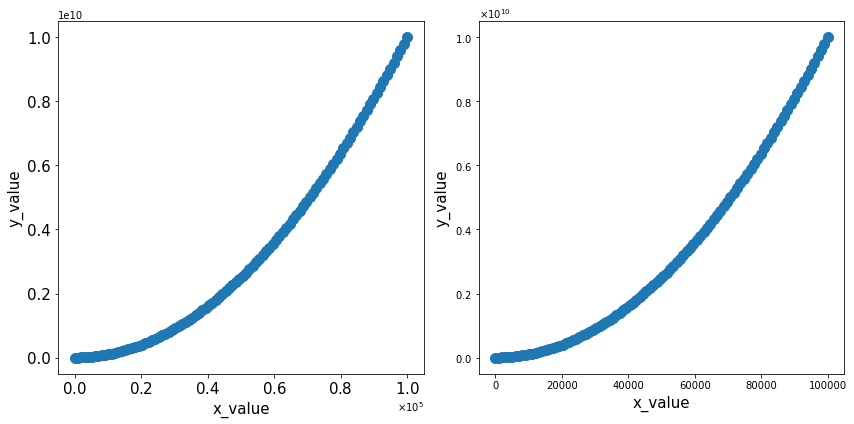

In [13]:
# create some big numbers
x2 = np.linspace(0, 1e5, 100)
y2 = x2 ** 2

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# the left figure
axs[0].scatter(x2, y2, s=100, marker="o")

# set ax labels
axs[0].set_xlabel("x_value", fontsize=15)
axs[0].set_ylabel("y_value", fontsize=15)

# set ax ticklabels
axs[0].tick_params(labelsize=15)

# the right figure
axs[1].scatter(x2, y2, s=100, marker="o")

axs[1].set_xlabel("x_value", fontsize=15)
axs[1].set_ylabel("y_value", fontsize=15)

# change number notation
formatter = plt.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) # use scientific notation

# if the number is smaller than 0.1 (10**-1) or bigger than 10 (10**1), scientific notation will be used
formatter.set_powerlimits((-1,1))

axs[0].xaxis.set_major_formatter(formatter)
axs[1].yaxis.set_major_formatter(formatter)

# add gridlines
axs[0].grid()
axs[0].grid()

fig.tight_layout()

## insert plot

Text(0, 0.5, 'y_value')

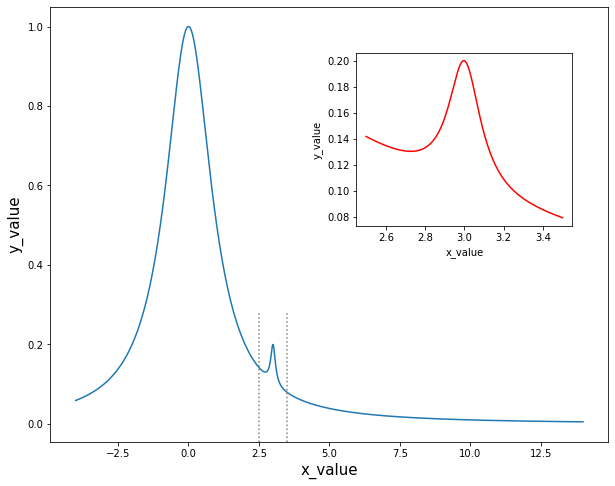

In [14]:
# create the x and y values for the main axis
x3 = np.linspace(-4, 14, 1000)
y3 = 1/(1 + x3**2) + 0.1/(1 + ((3 - x3)/0.1)**2)

fig, ax = plt.subplots(figsize=(10,8))

# plot x and y
ax.plot(x3, y3)

# set ax labels
ax.set_xlabel("x_value", fontsize=15)
ax.set_ylabel("y_value", fontsize=15)


# denote where to zoom in
x0, x1 = 2.5, 3.5

ax.axvline(x0, ymax=0.3, color="grey", ls="dotted")
ax.axvline(x1, ymax=0.3, color="grey", ls="dotted")

# use fig.add_axes()
# The dimensions [left, bottom, width, height] of the new Axes.
ax_insert = fig.add_axes([0.55, 0.5, 0.3, 0.3])

# create the x and y values for the insert
x4 = np.linspace(x0, x1, 1000)
y4 = 1/(1 + x4**2) + 0.1/(1 + ((3 - x4)/0.1)**2)

ax_insert.plot(x4, y4, color="red")

# set ax labels
ax_insert.set_xlabel("x_value", fontsize=10)
ax_insert.set_ylabel("y_value", fontsize=10)


## More on subplots 

`subplot2grid` is able to create grids with Axes instances that **span** multiple rows and/or columns. <br><br>

1. `subplot2grid` takes two mandatory arguments: the first argument is the shape of the whole Axes grid, in the form of a tuple (nrows, ncols), and the second argument is a tuple (row, col) that specifies the starting position within the grid. <br><br>

2. The two optional keyword arguments colspan and rowspan can be used to indicate how many rows and columns the new Axes instance should span. <br><br>

![](img/subplot2grid_book.png)

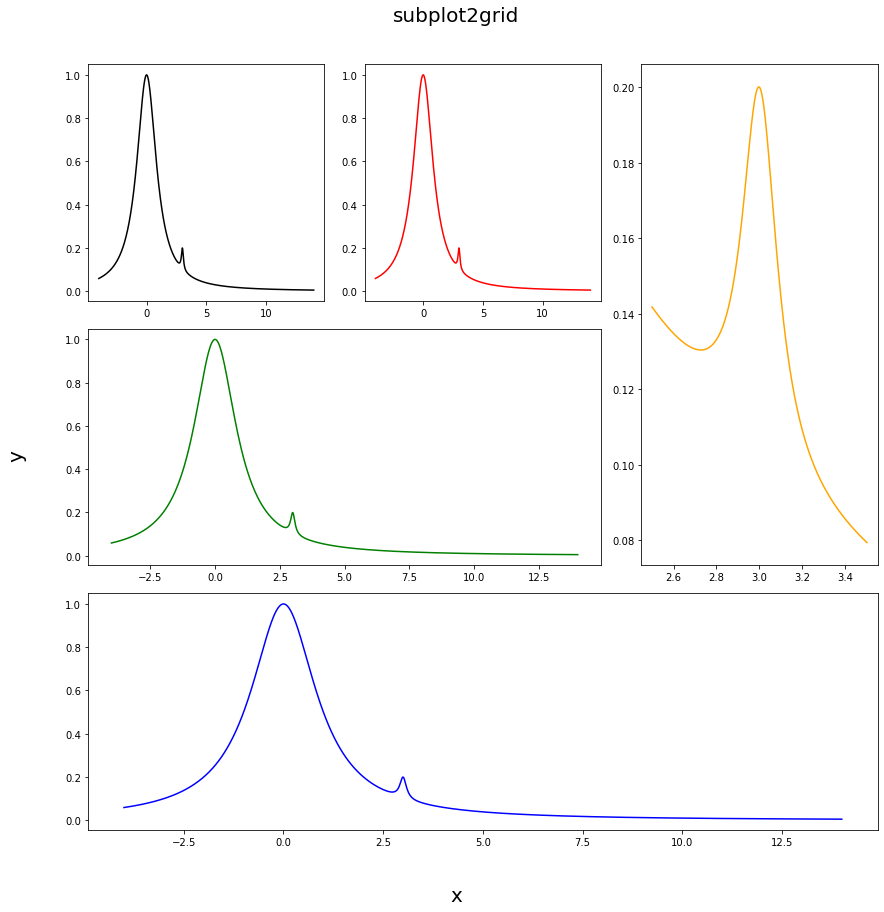

In [15]:
fig = plt.figure(figsize=(12, 12))

# add the first
ax1 = plt.subplot2grid((3,3), (0,0))
ax1.plot(x3, y3, color="black")

# add the second
ax2 = plt.subplot2grid((3,3), (0,1))
ax2.plot(x3, y3, color="red")

# add the third which spans two columns
ax3 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3.plot(x3, y3, color="green")

# add the fourth which spans three columns
ax4 = plt.subplot2grid((3,3), (2,0), colspan=3)
ax4.plot(x3, y3, color="blue")

# add the fifth which spans two rows
ax5 = plt.subplot2grid((3,3), (0,2), rowspan=2)
ax5.plot(x4, y4, color="orange")

# add the total title, x, y label and adjust the gap to the axis
fig.suptitle("subplot2grid", fontsize=20, y=1.02)

fig.supxlabel("x", fontsize=20, y=-0.02)

fig.supylabel("y", fontsize=20, x = -0.02)

# tighten the layout
fig.tight_layout()

## 2D plots

A fundamental part of 2 dimensional plots is how to input the (x, y) coordinates, and this mainly depends on whether we have *structured* or *unstructured* data. When (x, y) coordinates are **randomly distributed**, the data are unstructured. When (x, y) coordinates are on **regular grids**, the data are structured.

The function `scatter` can be used to plot unstructured data whereas `pcolormesh` required structured data. The following examples illustrate these differences.

![structure](img/structure_unstructure.png)

(1000,)
(1000,)


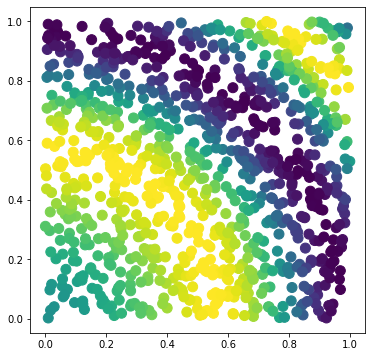

In [17]:
x5 = np.random.rand(1000)  # x coordinate
y5 = np.random.rand(1000)  # y coordinate
z = np.sin((x5**2 + y5**2)*5.0)  # data values at the x, y locations

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x5, y5, c=z, marker="o", s=100, cmap='viridis')

print(x5.shape)
print(z.shape)

## Structured 2D plot (pcolormesh)

We want to move from this unstructured data to structured data, which can improve visualization and allow us to make more calculations. To do this, we need to use pcolormesh.

    pcolormesh(X, Y, Z, cmap=colormap, vmin=data_min, vmax=data_max)

A few notes:

* X, Y are 2D arrays representing the regular grid locations of X and Y; Z is the 2D array representing our value corresponding to each single X and Y pair in the regular grid

* The `X` and `Y` locations associated with the `Z` values are assumed to be at the corners of the block of information represented by an element in `Z`; so `X` and `Y` should have one more element in both the x and y directions; if `X` and `Y` are given with the same shape as `Z`, the final row and column in `Z` will be ignored and **you will see some warning message**. You don't need to worry too much about this restriction for now.

**Steps involved to create X, Y and Z**

1. create meshgrid of X and Y.
2. interpolate the orginal z value to the new X and Y meshgrid to get the Z value.
3. Plot!

### 1. Create the meshgrid of X and Y

<img src="img/gridding.png" width="600"/>

#### 1.1 we first create x and y 1D coordinate vector

In [16]:
# set up coordinate vector for x and y that cover the full range of the 
# x and y coordinates
xi = np.linspace(x5.min(), x5.max(), 50)
yi = np.linspace(y5.min(), y5.max(), 50)

#### 1.2 we then use meshgrid to create the 2D cooridnate array

`meshgrid` converts from **a x and a y vector of coordinates** to **arrays of x and y coordinates**. 

The vectors are copied across the array. This image from Microsoft Excel shows how to think about it.

![example](https://i.stack.imgur.com/8Mbig.png)

Then, we can change from the 1D vector to the 2D array, like in the image. These X and Y coordinate arrays are what we'll be able to plot with and perform calculations on.

In [17]:
# X and Y are these arrays
X, Y = np.meshgrid(xi, yi)  # uniform grid

In [18]:
X.shape

(50, 50)

In [19]:
Y.shape

(50, 50)

### 2. Interpolate to get Z

Now we can interpolate our `z` values onto the new coordinate arrays, `X` and `Y`.

We will use [`griddata`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html) from `scipy.interpolate` to do this two dimensional interpolation.

    Z = griddata((x,y), z, (X, Y), method='cubic', fill_value=0)

`method` can be **'linear', 'nearest', 'cubic'**, and `fill_value` fills in outside of the points.

In [20]:
Z = griddata((x5, y5), z, (X, Y), method='cubic', fill_value=np.nan)

In [21]:
Z.shape

(50, 50)

### 3. Plot

/var/folders/4l/gn64yzcd6938cphmlv0bpkj80000gn/T/ipykernel_13692/1222010413.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = axs[1].pcolormesh(X, Y, Z, cmap='viridis')


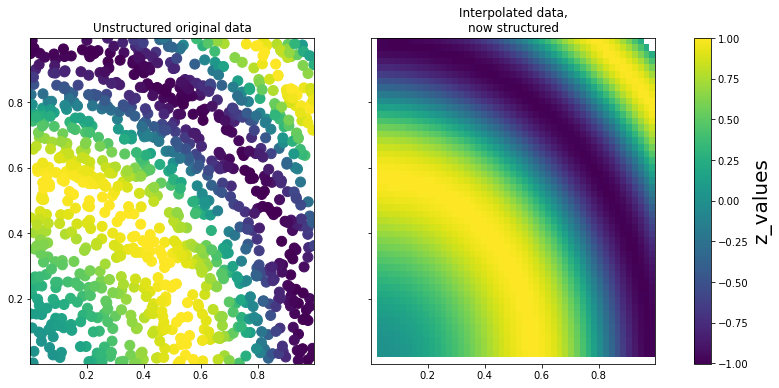

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,6), sharex=True, sharey=True)

# Unstructured points
axs[0].scatter(x5, y5, c=z, s=100, cmap='viridis')
axs[0].set_title('Unstructured original data')

# Interpolated 2D
# use cmap to specify the color palette
mappable = axs[1].pcolormesh(X, Y, Z, cmap='viridis')

axs[1].set_title('Interpolated data,\nnow structured')

# add colorbar
cb = fig.colorbar(mappable, ax=axs, orientation="vertical")

cb.set_label("z_values", fontsize=20)

## Structured 2D plot (contour/contourf): <br>

## `contour/contourf(X, Y, Z, N or V, colors, cmap, levels)`

The setup for `contour` and `contourf` are similar: both take in structured X, Y arrays with Z information to plot in two dimensions. `contour` plots isolines, which have equal values along the lines (like contours on a terrain map). `contourf` fill in the space between the contour lines.  *Note, `contour` and `contourf` assume that the input X, Y locations give the location of the datapoint itself, as opposed to the edges of a box in `pcolormesh`.* Thus, the X, Y, and Z have same shapes.

Some useful optional inputs include `cmap`, a colormap instance to use; `colors`, a string or tuple of color inputs to use for the contours; and `levels`, where you can specify the actual levels to use in the contours. There is an option to input `vmin` and `vmax` like in `pcolormesh` but this typically doesn't work as intended in contour/contourf — it's better to use `levels` instead.

Note that you can also use `contour` in conjunction with `clabel` to label in the plot the value of the contours.

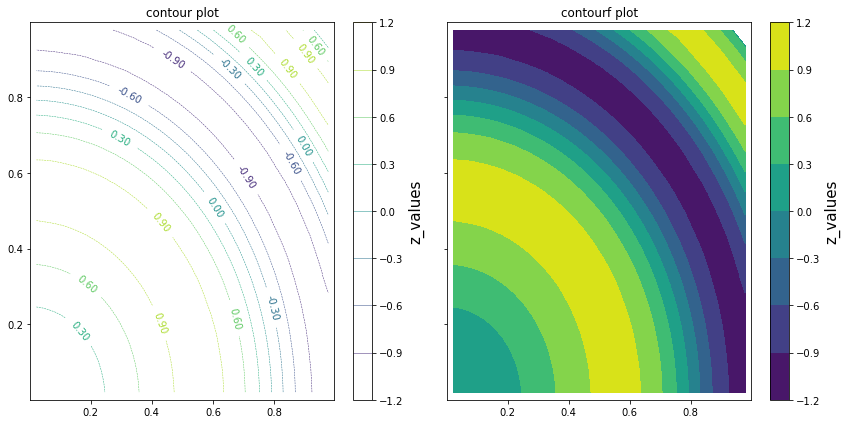

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6), sharey=True)

# plot contour
mappable = axs[0].contour(X, Y, Z, cmap='viridis', linestyles='--', linewidths=0.5, levels=6)
axs[0].set_title('contour plot')

cb1 = fig.colorbar(mappable, ax = axs[0], orientation="vertical")
axs[0].clabel(mappable, fmt='%.2f')
cb1.set_label("z_values", fontsize=15)



# plot contourf
mappable = axs[1].contourf(X, Y, Z, cmap='viridis', levels=6)
axs[1].set_title('contourf plot')

cb2 = fig.colorbar(mappable, ax = axs[1], orientation="vertical")
cb2.set_label("z_values", fontsize=15)


# adjust the space between subplots
fig.tight_layout()

*horizontal legend bar*

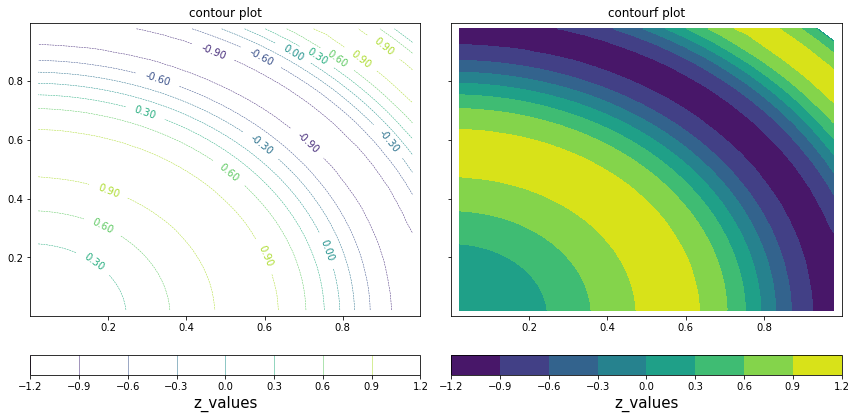

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6), sharey=True)


# plot contour
mappable = axs[0].contour(X, Y, Z, cmap='viridis', linestyles='--', linewidths=0.5, levels=6)
axs[0].set_title('contour plot')

cb1 = fig.colorbar(mappable, ax = axs[0], orientation="horizontal", pad=0.1)
axs[0].clabel(mappable, fmt='%.2f')
cb1.set_label("z_values", fontsize=15)


# plot contourf
mappable = axs[1].contourf(X, Y, Z, cmap='viridis', levels=6)
axs[1].set_title('contourf plot')

cb2 = fig.colorbar(mappable, ax = axs[1], orientation="horizontal", pad=0.1)
cb2.set_label("z_values", fontsize=15)

# adjust the space between subplots
fig.tight_layout()

## Colormaps

We have used the `viridis` colormap in the above plots. It is a very good one because it is perceptually uniform.

### Other good colormaps to use:

#### 1. for sequential data:

Both of these sets are ok, though the first have better perceptual properties.

<img src="img/viridis_series.png" alt="viridis" width="50%"/>

![](http://matplotlib.org/_images/colormaps_reference_01.png)

#### 2. for diverging data (data that diverges away from a critical value, often 0):

![](http://matplotlib.org/_images/colormaps_reference_03.png)

#### 3. for commonly-used oceanographic variables. install [cmocean](https://matplotlib.org/cmocean/) into our current conda environment

![](https://matplotlib.org/cmocean/_images/index-1.png)


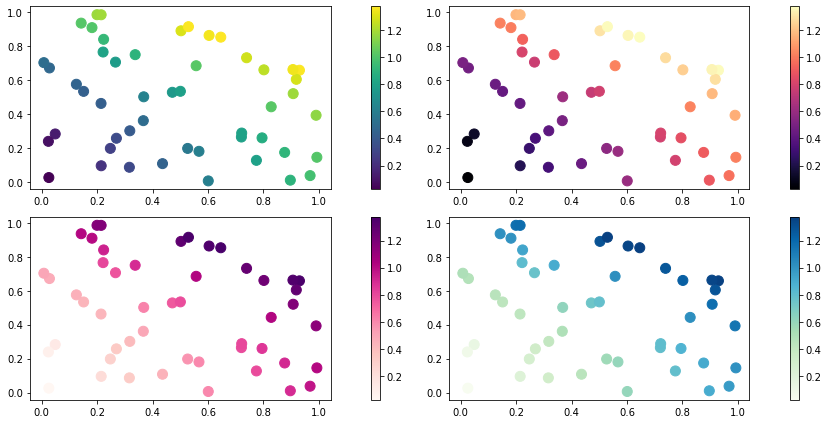

In [25]:
# vertical colorbar

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

# first axes
mappable = axs[0,0].scatter(x, y, c=colors, s=100, marker="o", cmap="viridis")

# add colorbar
cb = fig.colorbar(mappable, ax=axs[0,0], orientation="vertical", pad=0.1)

# second axes
mappable = axs[0,1].scatter(x, y, c=colors, s=100, marker="o", cmap="magma")

# add colorbar
cb = fig.colorbar(mappable, ax=axs[0,1], orientation="vertical", pad=0.1)

# third axes
mappable = axs[1,0].scatter(x, y, c=colors, s=100, marker="o", cmap="RdPu")

# add colorbar
cb = fig.colorbar(mappable, ax=axs[1,0], orientation="vertical", pad=0.1)

# fourth axes
mappable = axs[1,1].scatter(x, y, c=colors, s=100, marker="o", cmap="GnBu")

# add colorbar
cb = fig.colorbar(mappable, ax=axs[1,1], orientation="vertical", pad=0.1)

fig.tight_layout()



###  *Exercise*

> reverse the colorbar on the top right subplot


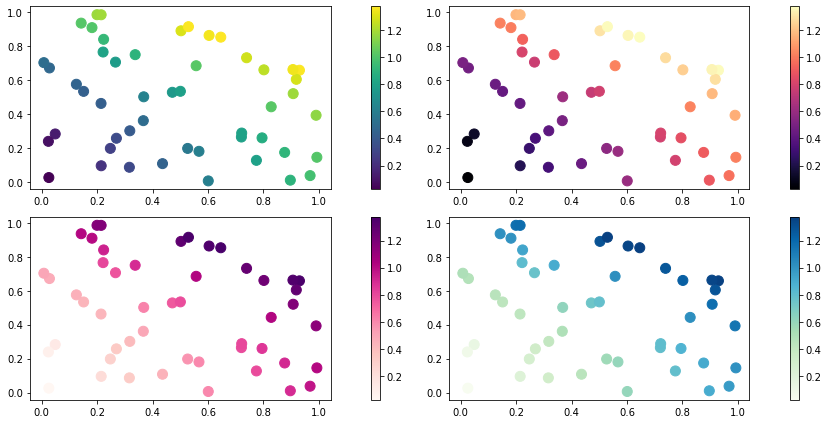

In [27]:
# vertical colorbar

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

# first axes
mappable = axs[0,0].scatter(x, y, c=colors, s=100, marker="o", cmap="viridis")

# add colorbar
cb = fig.colorbar(mappable, ax=axs[0,0], orientation="vertical", pad=0.1)

# second axes
mappable = axs[0,1].scatter(x, y, c=colors, s=100, marker="o", cmap="magma")

# add colorbar
cb = fig.colorbar(mappable, ax=axs[0,1], orientation="vertical", pad=0.1)

# third axes
mappable = axs[1,0].scatter(x, y, c=colors, s=100, marker="o", cmap="RdPu")

# add colorbar
cb = fig.colorbar(mappable, ax=axs[1,0], orientation="vertical", pad=0.1)

# fourth axes
mappable = axs[1,1].scatter(x, y, c=colors, s=100, marker="o", cmap="GnBu")

# add colorbar
cb = fig.colorbar(mappable, ax=axs[1,1], orientation="vertical", pad=0.1)

fig.tight_layout()

## More on colorbar

When you plot multiple subplots that have the same colormap, you need to individually set them up to properly show the range of colors in the colorbar.

- For `pcolormesh` this mean setting the `vmin/vmax` for each subplot to the same values.

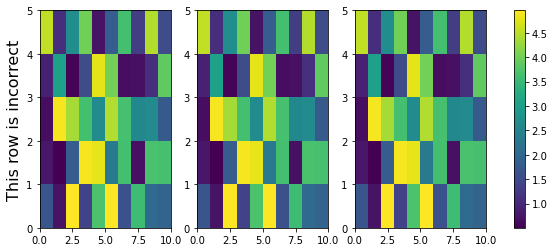

In [28]:
Z = np.random.rand(5, 10)
X,Y = np.meshgrid(np.arange(0,11), np.arange(0, 6))


fig, axs = plt.subplots(figsize=(10,4), nrows=1, ncols=3)

# for this figure, we will NOT set the max and min data values

axs[0].pcolormesh(X, Y, Z, cmap='viridis')
axs[0].set_ylabel('This row is incorrect', fontsize=16)

axs[1].pcolormesh(X, Y, Z*2, cmap='viridis')

mappable = axs[2].pcolormesh(X, Y, Z*5, cmap='viridis')  # we choose some pcolormesh call to set the mappable variable

fig.colorbar(mappable, ax=axs)


*do you see anything wrong in the above plot?* 

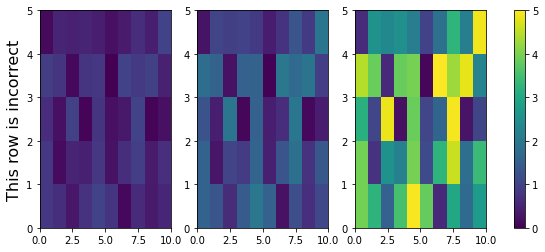

In [29]:
Z = np.random.rand(5, 10)
X,Y = np.meshgrid(np.arange(0,11), np.arange(0, 6))


fig, axs = plt.subplots(figsize=(10,4), nrows=1, ncols=3)

# we now set the max and min data values properly

dmin = 0
dmax = 5

axs[0].pcolormesh(X, Y, Z, cmap='viridis', vmin=dmin, vmax=dmax)
axs[0].set_ylabel('This row is incorrect', fontsize=16)

axs[1].pcolormesh(X, Y, Z*2, cmap='viridis', vmin=dmin, vmax=dmax)

mappable = axs[2].pcolormesh(X, Y, Z*5, cmap='viridis', vmin=dmin, vmax=dmax)  # we choose some pcolormesh call to set the mappable variable

fig.colorbar(mappable, ax=axs)


## Seaborn plot

[Seaborn](https://seaborn.pydata.org/) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [36]:
sns.set_style("white")

In [37]:
df = sns.load_dataset('tips')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [39]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Scatter plot

In [40]:
# color set defined manually

_11_lg = '#95C061' # green
_12_lb = '#75ABDE' # blue
_13_lo = '#FE9C43' # orange
_14_lbr = '#A6886D' # brown
_15_lr = '#E7675D' # red
_16_lp = '#7C5674' # purple

color_set = [_11_lg, _12_lb, _13_lo, _14_lbr, _15_lr, _16_lp]

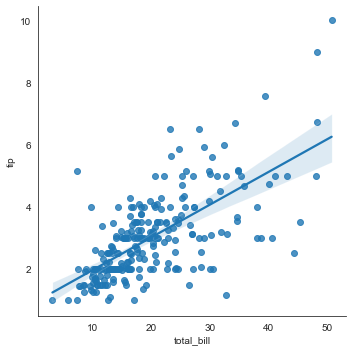

In [41]:
# auto add regression line and confidence interval
# we can use scatter_kws and line_kws to change the color of the symbols and the lines
sns.lmplot(x='total_bill', 
           y='tip', 
           data=df, 
           markers='o')

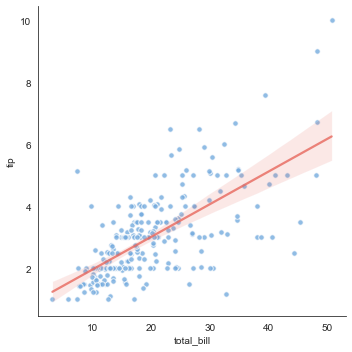

In [42]:
# auto add regression line
# we can use scatter_kws and line_kws to change the color of the symbols and the lines
sns.lmplot(x='total_bill', 
           y='tip', 
           data=df, 
           markers='o', 
           scatter_kws = {'facecolor': _12_lb, 'edgecolor': 'white', "s": 30, 'linewidths': 1}, 
           line_kws={'color': _15_lr, "alpha":0.8})

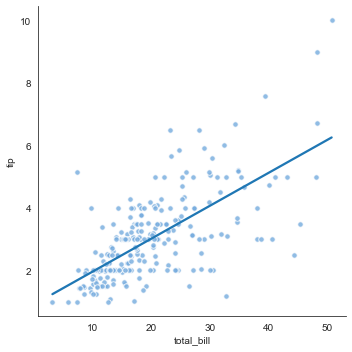

In [43]:
# disable the confidence interval
sns.lmplot(x='total_bill', 
           y='tip', 
           data=df, 
           markers='o', 
           scatter_kws = {'facecolor': _12_lb, 'edgecolor': 'white', "s": 30, 'linewidths': 1},
           fit_reg = True,
           ci = None)

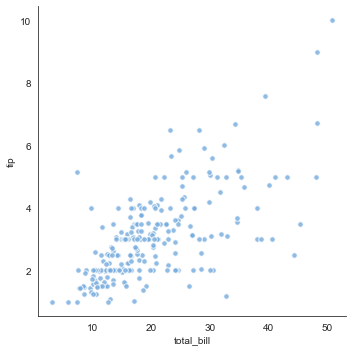

In [44]:
# disable the regression line and the confidence interval
sns.lmplot(x='total_bill', 
           y='tip', 
           data=df, 
           markers='o', 
           scatter_kws = {'facecolor': _12_lb, 'edgecolor': 'white', "s": 30, 'linewidths': 1}, 
           fit_reg = False)

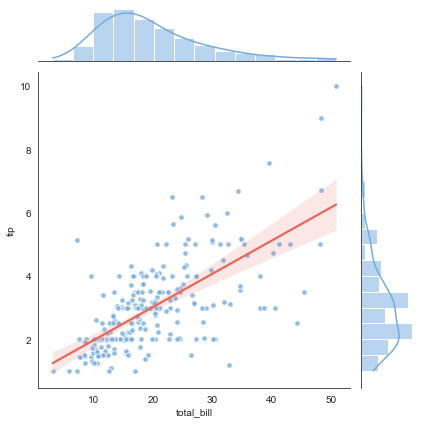

In [45]:
# show the distributions as well as the fitted line
sns.jointplot(x='total_bill', 
              y='tip', 
              data=df, 
              color = _12_lb,
              marker='o', # note that this is not markers as in lmplot
              scatter_kws = {'edgecolor': 'white', "s": 30, 'linewidths': 1}, 
              line_kws={'color': _15_lr},
              kind='reg')

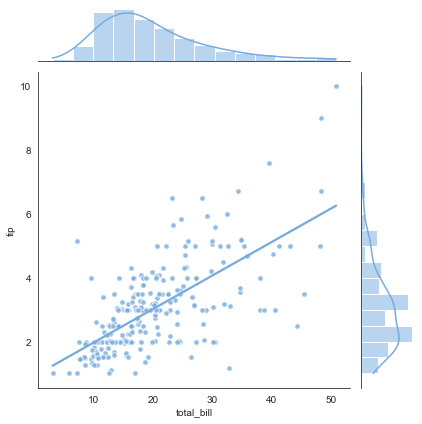

In [46]:
# disable the confidence interval
sns.jointplot(x='total_bill', 
              y='tip', 
              data=df, 
              color = _12_lb,
              marker = 'o', # note that this is not markers as in lmplot
              scatter_kws = {'edgecolor': 'white', "s": 30, 'linewidths': 1},
              kind='reg',
              fit_reg = True,
              ci = None)

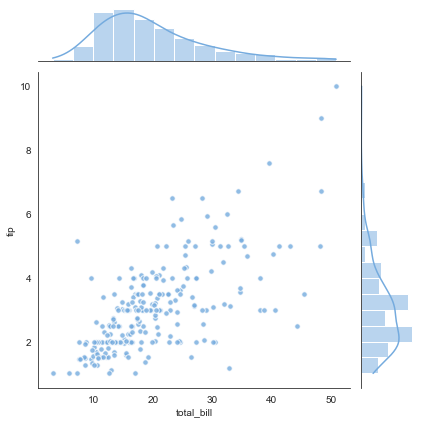

In [47]:
# disable the regression line and the confidence interval
sns.jointplot(x='total_bill', 
              y='tip', 
              data=df, 
              color = _12_lb,
              marker = 'o', # note that this is not markers as in lmplot
              scatter_kws = {'edgecolor': 'white', "s": 30, 'linewidths': 1},
              kind='reg',
              fit_reg = False)

In [48]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


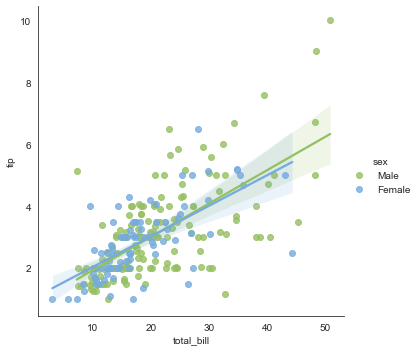

In [49]:
### now we plot tip vs. total_bill for male and female separately on the same plot
sns.lmplot(x='total_bill', 
           y='tip', 
           data=df, 
           hue='sex', 
           palette={'Male': color_set[0], 'Female': color_set[1]})

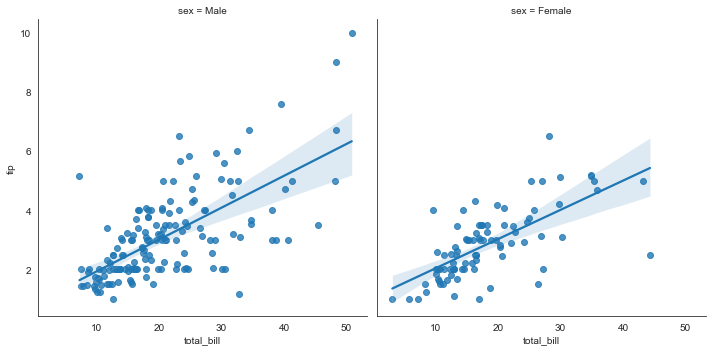

In [50]:
# you can separate them to two panels
sns.lmplot(x='total_bill', 
           y='tip', 
           data=df, 
           col='sex')

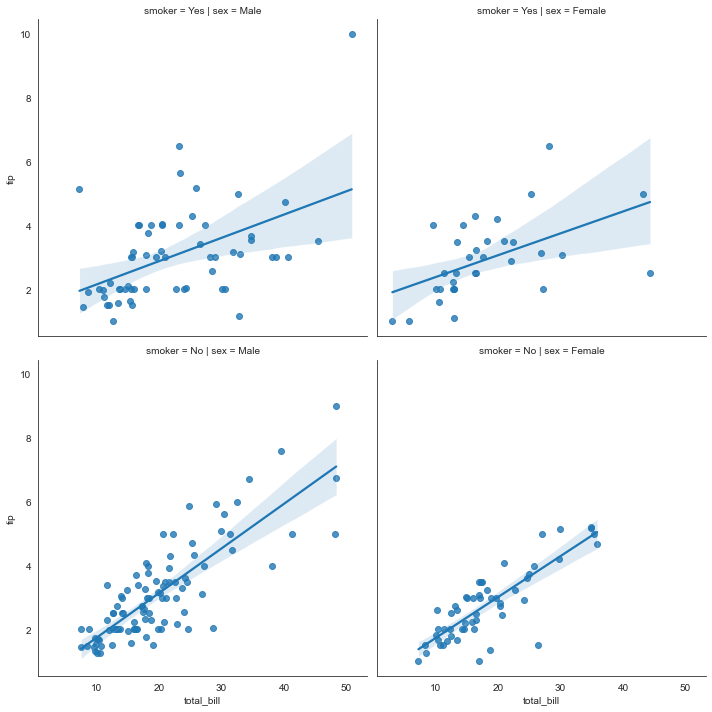

In [51]:
# further divide by smoker
sns.lmplot(x='total_bill', 
           y='tip', 
           data=df, 
           col='sex', 
           row='smoker')

#### Countplot

In [52]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='day', ylabel='count'>

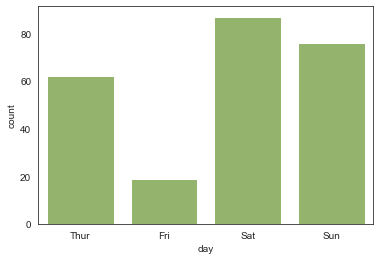

In [53]:
sns.countplot(x='day', data=df, color=color_set[0])

<AxesSubplot:xlabel='count', ylabel='day'>

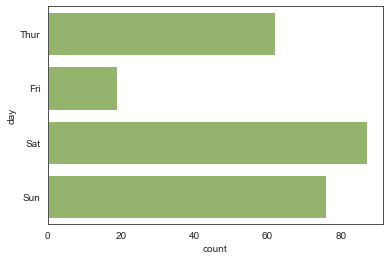

In [54]:
# Horizontal
sns.countplot(y='day', data=df, color=color_set[0])

#### Barplot

<AxesSubplot:xlabel='sex', ylabel='tip'>

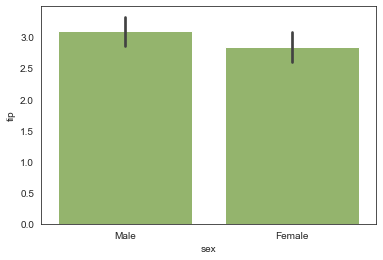

In [55]:
sns.barplot(x='sex', y='tip', data=df, color=color_set[0])

<AxesSubplot:xlabel='tip', ylabel='sex'>

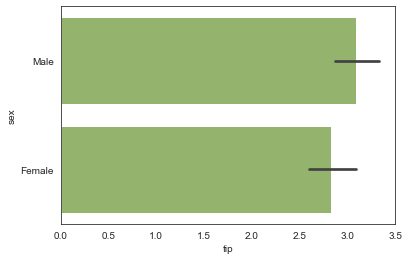

In [60]:
# Horizontal
sns.barplot(x='tip', y='sex', data=df, color=color_set[0])

#### Histogram

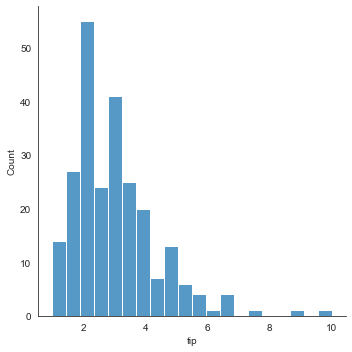

In [61]:
sns.displot(x='tip', data=df, bins=20, kde=False)

In [ ]:
# add kernel density estimation
sns.displot(x='tip', data=df, bins=20, kde=True)

#### boxplot

<AxesSubplot:xlabel='day', ylabel='tip'>

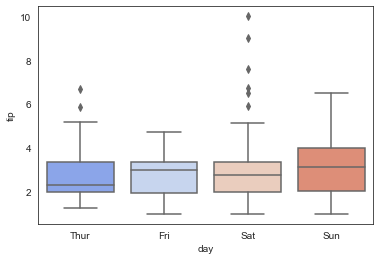

In [62]:
sns.boxplot(x='day', y='tip', data=df, palette='coolwarm')

#### Heatmap

In [63]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [64]:
# calculate correlation
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

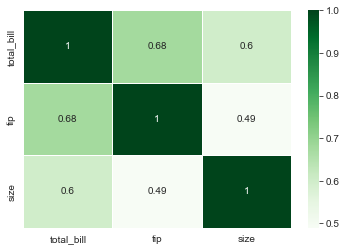

In [65]:
sns.heatmap(df.corr(), annot=True, cmap='Greens', lw=1)

#### Pairplot

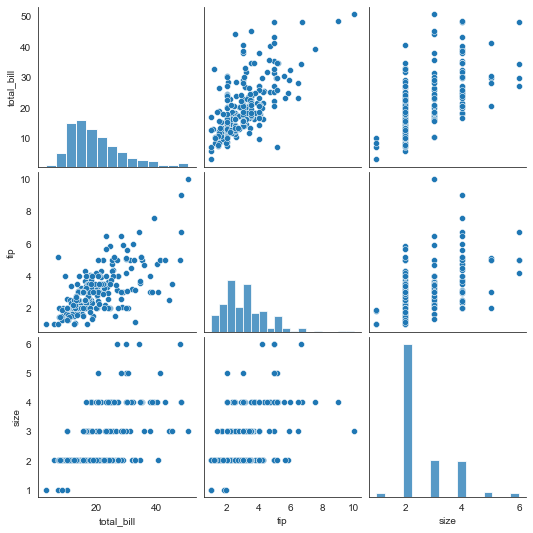

In [66]:
sns.pairplot(df)